### Import libraries

In [43]:
# data manipulation
import pandas as pd 

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns 

# data analysis
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Data Preparation

In [21]:
data_januari = pd.read_csv('./dataset-jogja-2021/psi-jogja-jan-2021.csv')
data_februari = pd.read_csv('./dataset-jogja-2021/psi-jogja-feb-2021.csv')
data_maret = pd.read_csv('./dataset-jogja-2021/psi-jogja-mar-2021.csv')
data_april = pd.read_csv('./dataset-jogja-2021/psi-jogja-apr-2021.csv')
data_mei = pd.read_csv('./dataset-jogja-2021/psi-jogja-may-2021.csv')
data_juni = pd.read_csv('./dataset-jogja-2021/psi-jogja-jun-2021.csv')
data_juli = pd.read_csv('./dataset-jogja-2021/psi-jogja-jul-2021.csv')
data_agustus = pd.read_csv('./dataset-jogja-2021/psi-jogja-aug-2021.csv')
data_september = pd.read_csv('./dataset-jogja-2021/psi-jogja-sep-2021.csv')
data_oktober = pd.read_csv('./dataset-jogja-2021/psi-jogja-oct-2021.csv')
data_november = pd.read_csv('./dataset-jogja-2021/psi-jogja-nov-2021.csv')
data_desember = pd.read_csv('./dataset-jogja-2021/psi-jogja-dec-2021.csv')

df = pd.concat([data_januari, data_februari, data_maret, data_april, data_mei, data_juni, data_juli, data_agustus, data_september, data_oktober, data_november, data_desember])
df

,Date,Time,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2021,00:00:00,13.0,40.0,0.0,25.0,0.0,0.0,40,PM2.5,Good
1,1/1/2021,01:00:00,12.0,38.0,0.0,24.0,0.0,0.0,38,PM2.5,Good
2,1/1/2021,02:00:00,11.0,35.0,0.0,23.0,0.0,0.0,35,PM2.5,Good
3,1/1/2021,03:00:00,10.0,32.0,0.0,22.0,0.0,0.0,32,PM2.5,Good
4,1/1/2021,04:00:00,9.0,29.0,0.0,21.0,0.0,0.0,29,PM2.5,Good
...,...,...,...,...,...,...,...,...,...,...,...
739,12/31/2021,19:00:00,15.0,0.0,10.0,21.0,1.0,11.0,21,CO,Good
740,12/31/2021,20:00:00,16.0,0.0,10.0,21.0,1.0,11.0,21,CO,Good
741,12/31/2021,21:00:00,17.0,0.0,10.0,21.0,1.0,11.0,21,CO,Good
742,12/31/2021,22:00:00,18.0,0.0,10.0,21.0,1.0,11.0,21,CO,Good


In [22]:
df.describe()

,PM10,PM2.5,SO2,CO,O3,NO2,Max
count,8527.000000,8527.000000,6243.000000,8526.000000,5806.000000,8526.000000,8760.000000
mean,18.135335,37.982292,14.866090,12.747478,20.320703,4.183908,39.112215
std,7.865541,18.454578,11.113798,7.552322,17.721537,2.274109,16.800810
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,24.000000,5.000000,7.000000,3.000000,3.000000,25.000000
50%,17.000000,38.000000,17.000000,11.000000,19.000000,4.000000,38.000000
75%,22.000000,53.000000,21.000000,19.000000,33.000000,5.000000,53.000000
max,52.000000,92.000000,64.000000,38.000000,77.000000,12.000000,92.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 0 to 743
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                8760 non-null   object 
 1   Time                8760 non-null   object 
 2   PM10                8527 non-null   float64
 3   PM2.5               8527 non-null   float64
 4   SO2                 6243 non-null   float64
 5   CO                  8526 non-null   float64
 6   O3                  5806 non-null   float64
 7   NO2                 8526 non-null   float64
 8   Max                 8760 non-null   int64  
 9   Critical Component  8527 non-null   object 
 10  Category            8760 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 821.2+ KB


In [24]:
df.columns

Index(['Date', 'Time', 'PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2', 'Max',
       'Critical Component', 'Category'],
      dtype='object')

In [25]:
df.isnull().sum()

Date                     0
Time                     0
PM10                   233
PM2.5                  233
SO2                   2517
CO                     234
O3                    2954
NO2                    234
Max                      0
Critical Component     233
Category                 0
dtype: int64

#### Fill missing data with interpolate

In [26]:
df = df.interpolate(method='linear', limit_direction='forward', axis=0)
df

,Date,Time,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2021,00:00:00,13.0,40.0,0.0,25.0,0.0,0.0,40,PM2.5,Good
1,1/1/2021,01:00:00,12.0,38.0,0.0,24.0,0.0,0.0,38,PM2.5,Good
2,1/1/2021,02:00:00,11.0,35.0,0.0,23.0,0.0,0.0,35,PM2.5,Good
3,1/1/2021,03:00:00,10.0,32.0,0.0,22.0,0.0,0.0,32,PM2.5,Good
4,1/1/2021,04:00:00,9.0,29.0,0.0,21.0,0.0,0.0,29,PM2.5,Good
...,...,...,...,...,...,...,...,...,...,...,...
739,12/31/2021,19:00:00,15.0,0.0,10.0,21.0,1.0,11.0,21,CO,Good
740,12/31/2021,20:00:00,16.0,0.0,10.0,21.0,1.0,11.0,21,CO,Good
741,12/31/2021,21:00:00,17.0,0.0,10.0,21.0,1.0,11.0,21,CO,Good
742,12/31/2021,22:00:00,18.0,0.0,10.0,21.0,1.0,11.0,21,CO,Good


In [27]:
df.isnull().sum()

Date                    0
Time                    0
PM10                    0
PM2.5                   0
SO2                     0
CO                      0
O3                      0
NO2                     0
Max                     0
Critical Component    233
Category                0
dtype: int64

In [28]:
df.shape

(8760, 11)

In [29]:
df = df[~df.index.duplicated()]

### EDA

Text(0.5, 1.02, 'Distribusi Data Polutan')

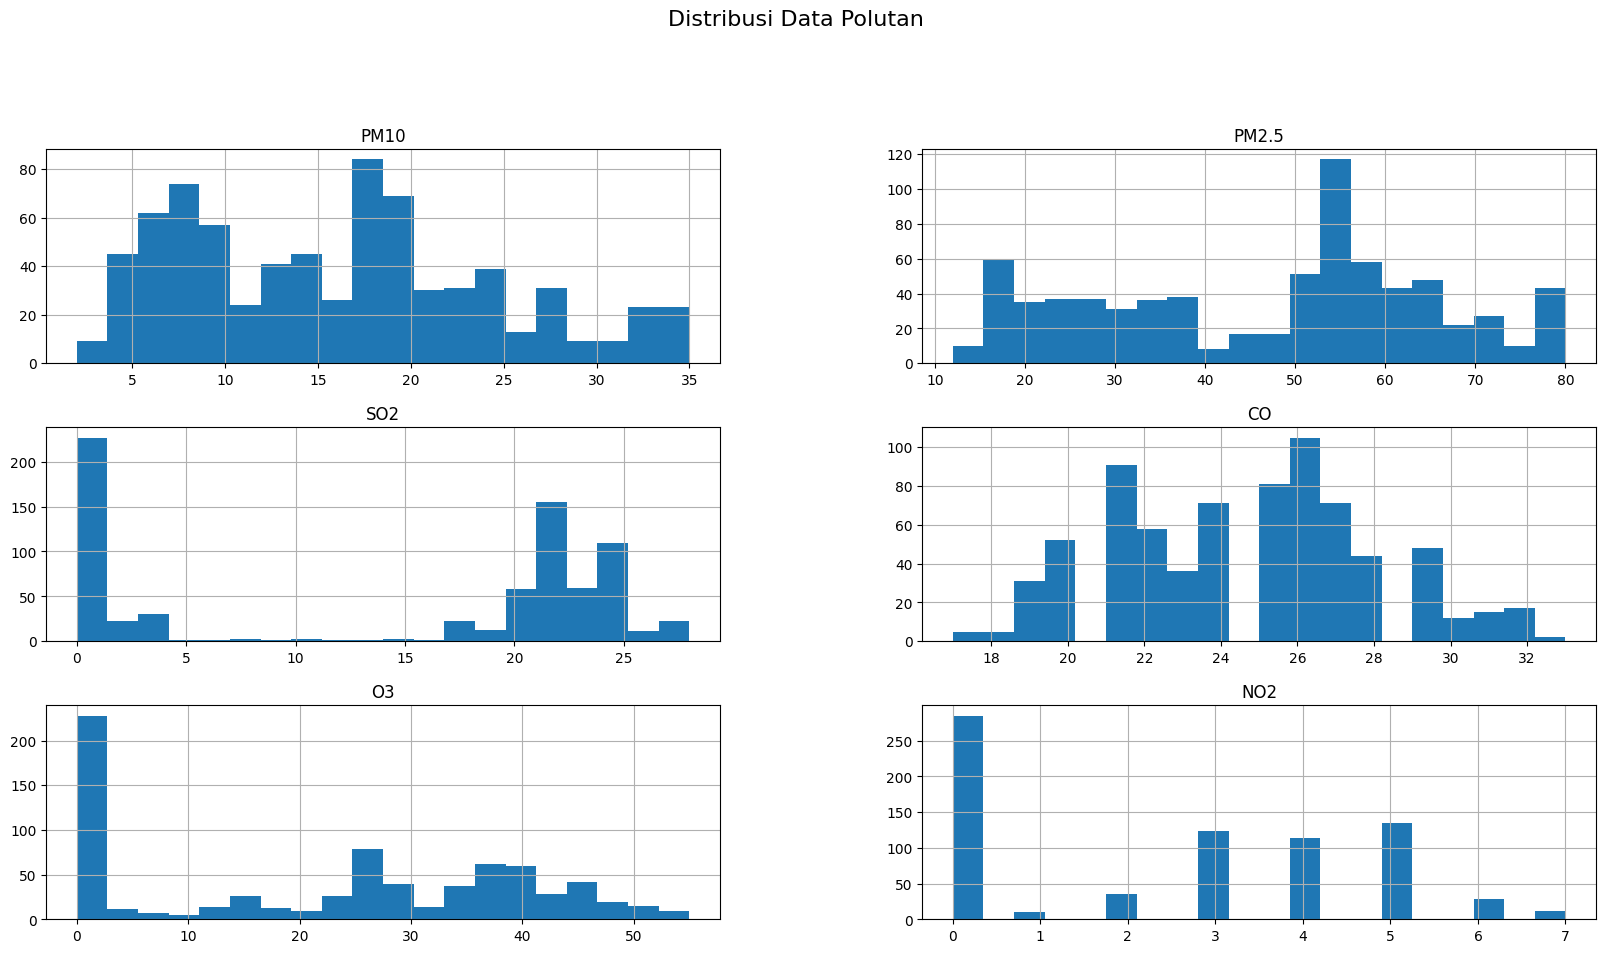

In [30]:
pollutants = ['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2']
df.hist(column=pollutants, figsize=(20, 10), bins=20)
plt.suptitle('Distribusi Data Polutan', y=1.02, fontsize=16)

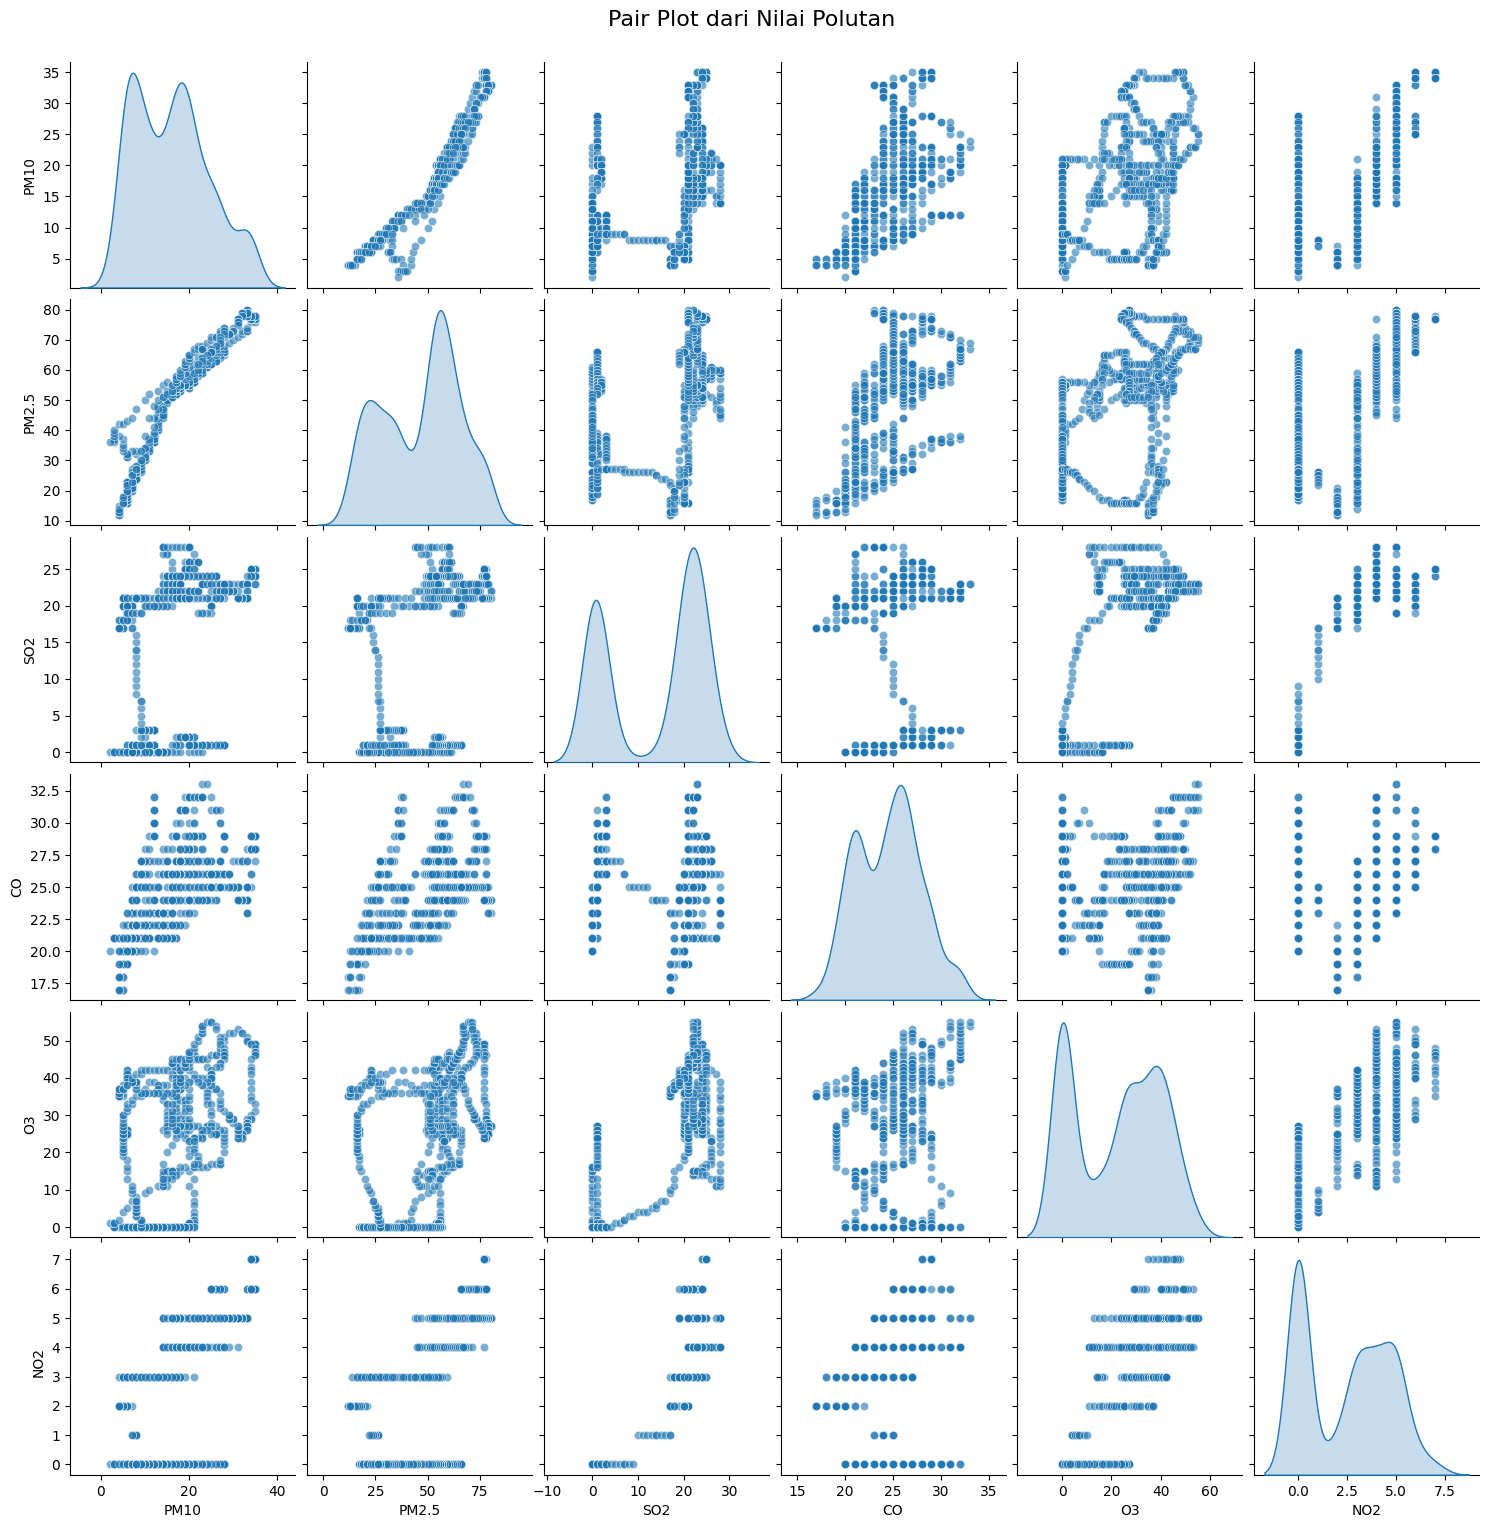

In [31]:
sns.pairplot(data=df[pollutants], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot dari Nilai Polutan', y=1.02, fontsize=16)
plt.show()

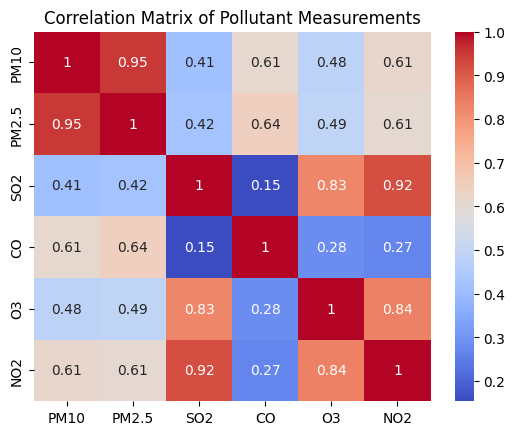

In [32]:
corr_matrix = df[['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Pollutant Measurements')
plt.show()

### Regression Analysis

#### Feature selection

In [44]:
X = df[['PM10', 'SO2', 'NO2', 'O3', 'CO']]
y = df['PM2.5']

#### Splitting data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Modelling

In [46]:
svm_model = SVR(kernel='linear')
svm_model.fit(X_train, y_train) # fitting
y_pred = svm_model.predict(X_test) # predicting

#### Evaluate

In [47]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)

Mean Squared Error (MSE): 26.145078714273726
Coefficient of Determination (R^2): 0.9233993563458598


#### Plotting

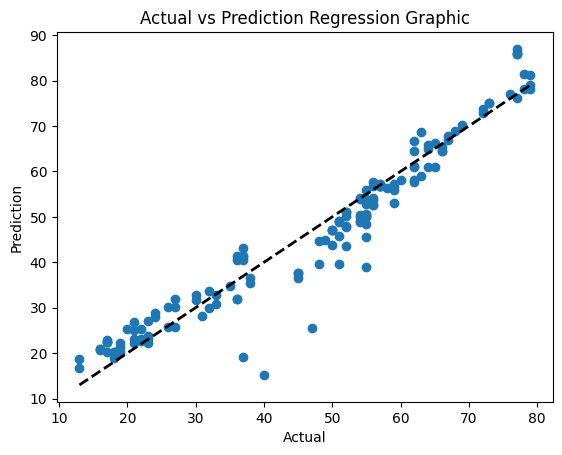

In [49]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Garis identitas
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs Prediction Regression Graphic')
plt.show()